In [1]:
import pandas as pd
import numpy as np

# Task 1: Data Acquisition and Data Wrangling on dataset 1 and dataset 2 

Data Acquisition

In [2]:
df=pd.read_excel("C:\\Users\\chora\\OneDrive\\Desktop\\Nexthike\\dataset_1.xlsx")

In [3]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,2011-01-01,1,0,1,0,False,6,1,0.24
1,2,2011-01-01,1,0,1,1,False,6,1,0.22
2,3,2011-01-01,1,0,1,2,False,6,1,0.22


In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp'],
      dtype='object')

In [5]:
df1=pd.read_excel("C:\\Users\\chora\\OneDrive\\Desktop\\Nexthike\\dataset_2.xlsx")

In [6]:
df1.head(3)

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0,3,13,16
1,1,2,0.2727,0.80,0.0,8,32,40
2,2,3,0.2727,0.80,0.0,5,27,32


In [7]:
df1.columns

Index(['Unnamed: 0', 'instant', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

# Merging Datasets

In [8]:
data=pd.merge(df,df1,on='instant',how='inner')

In [9]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,Unnamed: 0,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,False,6,1,0.24,0,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,False,6,1,0.22,1,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,False,6,1,0.22,2,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,False,6,1,0.24,3,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,False,6,1,0.24,4,0.2879,0.75,0.0,0,1,1


# Dropping Unwanted Columns

In [13]:
drop_data=data.drop(['Unnamed: 0','instant'], axis=1)

In [14]:
drop_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0,0,1,1


### Attribute information:
 
• date = date of the ride

• season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

• holiday - whether the day is considered a holiday

• working day - whether the day is neither a weekend nor a holiday

• weather:-
          1: Clear, Few clouds, Partly cloudy, Partly cloudy
          
          2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
          
          3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light 
             
             Rain +Scattered clouds
          
          4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
          
          
• temp - "feels like" temperature in Celsius

• atemp - "feels like" atmospheric pressure

• humidity - relative humidity

• windspeed - wind speed

• casual - number of non-registered user rentals initiated

• registered - number of registered user rentals initiated


• count - number of total rentals

           


In [19]:
drop_data.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [20]:
drop_data.shape

(610, 15)

In [21]:
#checking dimension of the dataset
drop_data.ndim

2

In [22]:
#checking datatype of the dataset
drop_data.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                 bool
weekday                int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

# Checking Duplicates

In [23]:
duplicates =drop_data[drop_data.duplicated()]

if duplicates.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")
    print(duplicates)


No duplicate rows found.


In [24]:
# Select columns with a specific data type, for example, only numeric columns
numeric_columns = drop_data.select_dtypes(include=np.number)


In [25]:
# Summary statistics for numeric columns
numeric_summary = drop_data.select_dtypes(include=np.number).describe()

# Summary statistics for categorical columns
categorical_summary = drop_data.select_dtypes(exclude=np.number).describe()


In [26]:
numeric_summary

,season,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,610.0,610.0,610.0,610.000000,610.000000,610.000000,610.000000,599.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,1.0,0.0,1.0,11.795082,2.977049,1.477049,0.196885,0.199935,0.562475,0.204851,4.501639,51.068852,55.570492
std,0.0,0.0,0.0,6.852107,2.054943,0.643496,0.081304,0.078836,0.175440,0.121806,6.319945,47.021204,49.316802
min,1.0,0.0,1.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.210000,0.000000,0.000000,0.000000,1.000000
25%,1.0,0.0,1.0,6.000000,1.000000,1.000000,0.160000,0.151500,0.432500,0.104500,0.000000,14.000000,16.000000
50%,1.0,0.0,1.0,12.000000,3.000000,1.000000,0.200000,0.197000,0.520000,0.194000,2.000000,43.000000,47.000000
75%,1.0,0.0,1.0,18.000000,5.000000,2.000000,0.235000,0.242400,0.690000,0.283600,6.000000,70.000000,79.750000
max,1.0,0.0,1.0,23.000000,6.000000,4.000000,0.460000,0.454500,1.000000,0.582100,47.000000,247.000000,249.000000


In [21]:
categorical_summary

,dteday
count,610
mean,2011-01-13 19:47:24.590163968
min,2011-01-01 00:00:00
25%,2011-01-07 00:00:00
50%,2011-01-14 00:00:00
75%,2011-01-21 00:00:00
max,2011-01-28 00:00:00


In [27]:
drop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      610 non-null    datetime64[ns]
 1   season      610 non-null    int64         
 2   yr          610 non-null    int64         
 3   mnth        610 non-null    int64         
 4   hr          610 non-null    int64         
 5   holiday     610 non-null    bool          
 6   weekday     610 non-null    int64         
 7   weathersit  610 non-null    int64         
 8   temp        610 non-null    float64       
 9   atemp       599 non-null    float64       
 10  hum         610 non-null    float64       
 11  windspeed   610 non-null    float64       
 12  casual      610 non-null    int64         
 13  registered  610 non-null    int64         
 14  cnt         610 non-null    int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(9)
memory usage: 67.4 KB


In [28]:
drop_data.isna().sum()

dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
weathersit     0
temp           0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64

# From above finding its clear that merged dataset has 11 null value in atemp column so we will replace the null value with mean value 

In [29]:
drop_data['atemp'].unique()

array([0.2879, 0.2727, 0.2576,    nan, 0.3485, 0.3939, 0.3333, 0.4242,
       0.4545, 0.4394, 0.4091, 0.2273, 0.2121, 0.197 , 0.1364, 0.1061,
       0.1212, 0.1667, 0.1818, 0.2424, 0.1515, 0.3182, 0.0606, 0.0758,
       0.0909, 0.303 , 0.0303, 0.0455, 0.    , 0.0152])

In [30]:
drop_data['atemp'].mean()

0.19993489148580967

In [32]:
drop_data['atemp'].replace(np.nan, drop_data['atemp'].mean(),inplace=True)

In [33]:
drop_data.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Uploading Dataset3

##Data Acquisition

In [34]:
d3=pd.read_excel("C:\\Users\\chora\\OneDrive\\Desktop\\Nexthike\\dataset_3.xlsx")

In [35]:
d3.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,2011-01-29,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,2011-01-29,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,2011-01-29,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,2011-01-29,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,2011-01-29,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2


In [36]:
d3.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [37]:
d3.shape

(390, 16)

In [38]:
d3.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                 bool
weekday                int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [40]:
duplicates =d3[d3.duplicated()]

if duplicates.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")
    print(duplicates)


No duplicate rows found.


In [41]:
drop=d3.drop(['instant'], axis=1)

In [42]:
concat_data=pd.concat([drop_data,drop],axis=0)

In [43]:
concat_data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0,0,1,1


# Finding Outliers in Dataset

In [36]:
## Calculate central tendency measures (mean, median, mode, etc.)
concat_data.describe()

,instant,dteday,season,yr,mnth,hr,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,1000.000000,1000,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2011-01-22 15:56:09.600000,1.0,0.0,1.312000,11.753000,2.982000,1.480000,0.205900,0.211826,0.582480,0.194931,4.921000,53.383000,58.304000
min,1.000000,2011-01-01 00:00:00,1.0,0.0,1.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.210000,0.000000,0.000000,0.000000,1.000000
25%,250.750000,2011-01-11 00:00:00,1.0,0.0,1.000000,6.000000,1.000000,1.000000,0.160000,0.166700,0.440000,0.104500,0.000000,15.000000,16.000000
50%,500.500000,2011-01-22 00:00:00,1.0,0.0,1.000000,12.000000,3.000000,1.000000,0.200000,0.212100,0.550000,0.164200,3.000000,46.000000,49.000000
75%,750.250000,2011-02-03 00:00:00,1.0,0.0,2.000000,18.000000,5.000000,2.000000,0.240000,0.257600,0.700000,0.283600,6.000000,74.000000,83.000000
max,1000.000000,2011-02-14 00:00:00,1.0,0.0,2.000000,23.000000,6.000000,4.000000,0.460000,0.454500,1.000000,0.582100,62.000000,247.000000,249.000000
std,288.819436,NaN,0.0,0.0,0.463542,6.899101,2.091423,0.651171,0.078977,0.076290,0.187977,0.129126,7.643899,47.893968,50.985558


In [53]:
q1=concat_data['cnt'].quantile(.25)
q3=concat_data['cnt'].quantile(.75)

In [54]:
def outlier(df,cols):
    q1=df[cols].quantile(.25)
    q3=df[cols].quantile(.75)
    iqr=q3-q1
    min_r=q1-1.5*iqr
    max_r=q3+1.5*iqr
    outlier_indices=df.index[(df[cols]<min_r)|(df[cols]>max_r)]
    return outlier_indices

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

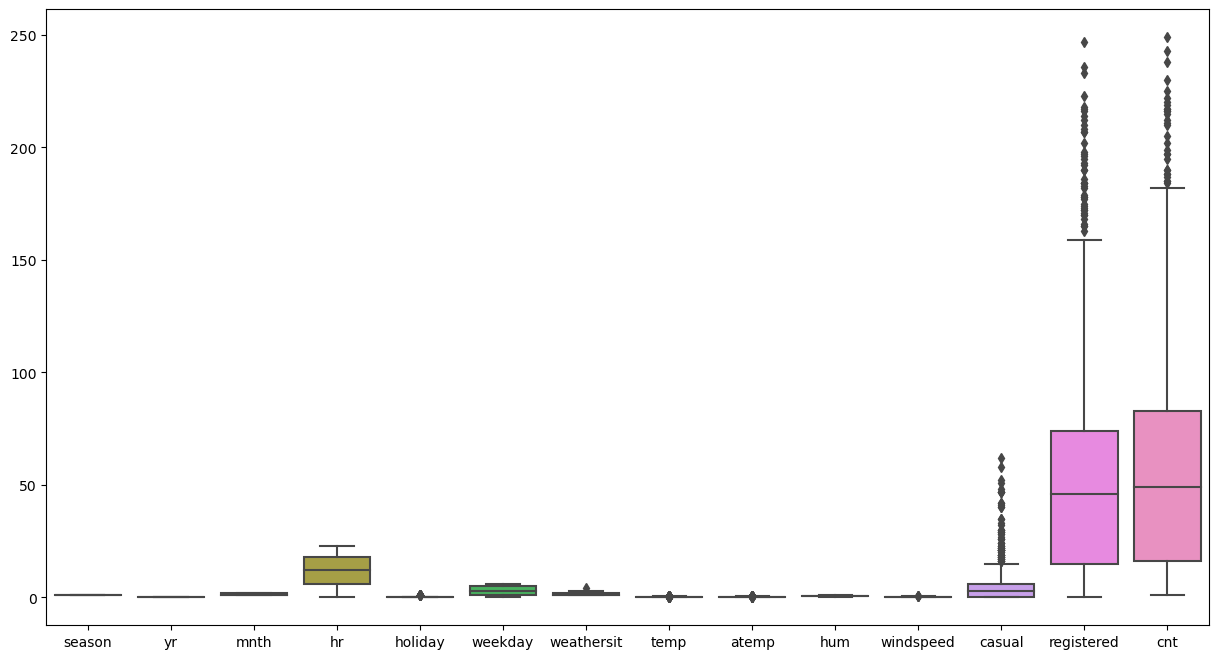

In [75]:
plt.figure(figsize=(15,8))
sns.boxplot(data=concat_data)

In [56]:
outlier(concat_data,'cnt')

Index([ 85,  99, 108, 122, 145, 154, 217, 239, 285, 415, 424, 439, 448, 449,
       463, 541, 555, 564, 565,  53, 109, 123, 146, 155, 218, 227, 242, 265,
       310, 319],
      dtype='int64')

<Axes: xlabel='cnt'>

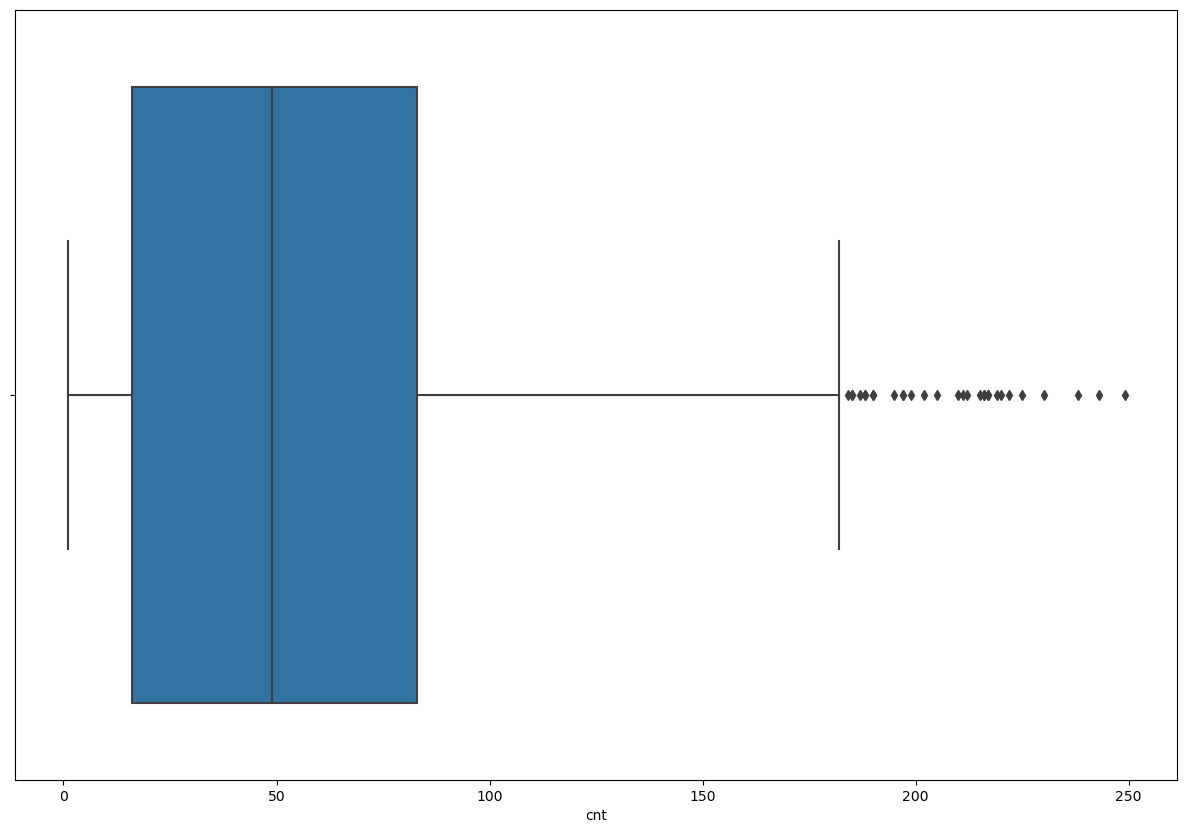

In [57]:
plt.figure(figsize=(15,10))
sns.boxplot(data=concat_data,x='cnt')

In [58]:
outlier(concat_data,'registered')

Index([ 76,  85,  86,  99, 108, 109, 122, 131, 145, 154, 217, 226, 239, 285,
       415, 424, 439, 448, 449, 463, 532, 541, 555, 564, 565,  53,  85,  86,
       109, 110, 123, 132, 146, 155, 218, 227, 228, 242, 251, 265, 275, 288,
       310, 319, 320],
      dtype='int64')

<Axes: xlabel='registered'>

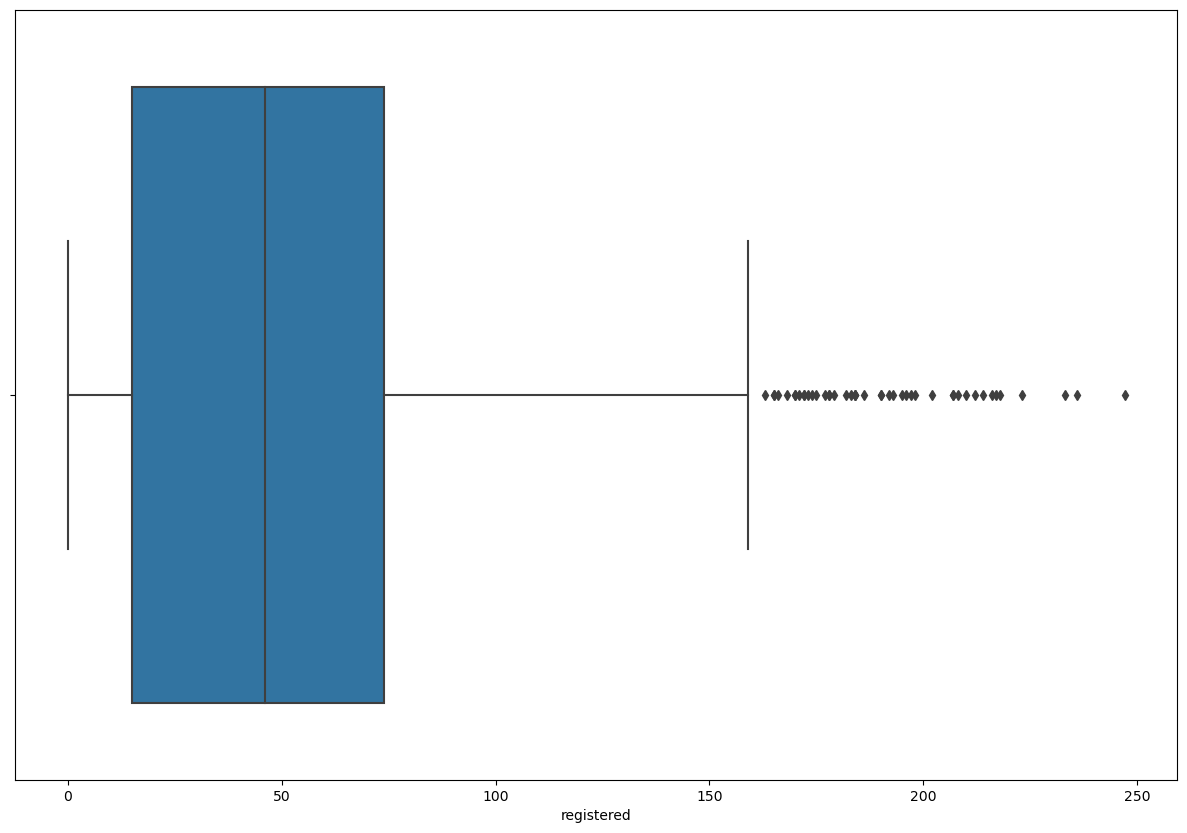

In [59]:
plt.figure(figsize=(15,10))
sns.boxplot(data=concat_data,x='registered')

In [60]:
outlier(concat_data,'casual')

Index([ 11,  12,  13,  14,  15,  16,  34,  35,  38,  81,  83, 145, 147, 148,
       335, 337, 338, 339, 340, 341, 359, 360, 361, 362, 363, 364, 365, 387,
       512, 513, 515, 559, 560, 562, 567,  13,  14,  35,  37, 197, 198, 199,
       200, 201, 202, 203, 226, 315, 316, 319, 337, 338, 339, 340, 341, 342,
       343, 359, 360, 361, 362, 363, 364, 365, 366, 367],
      dtype='int64')

<Axes: xlabel='casual'>

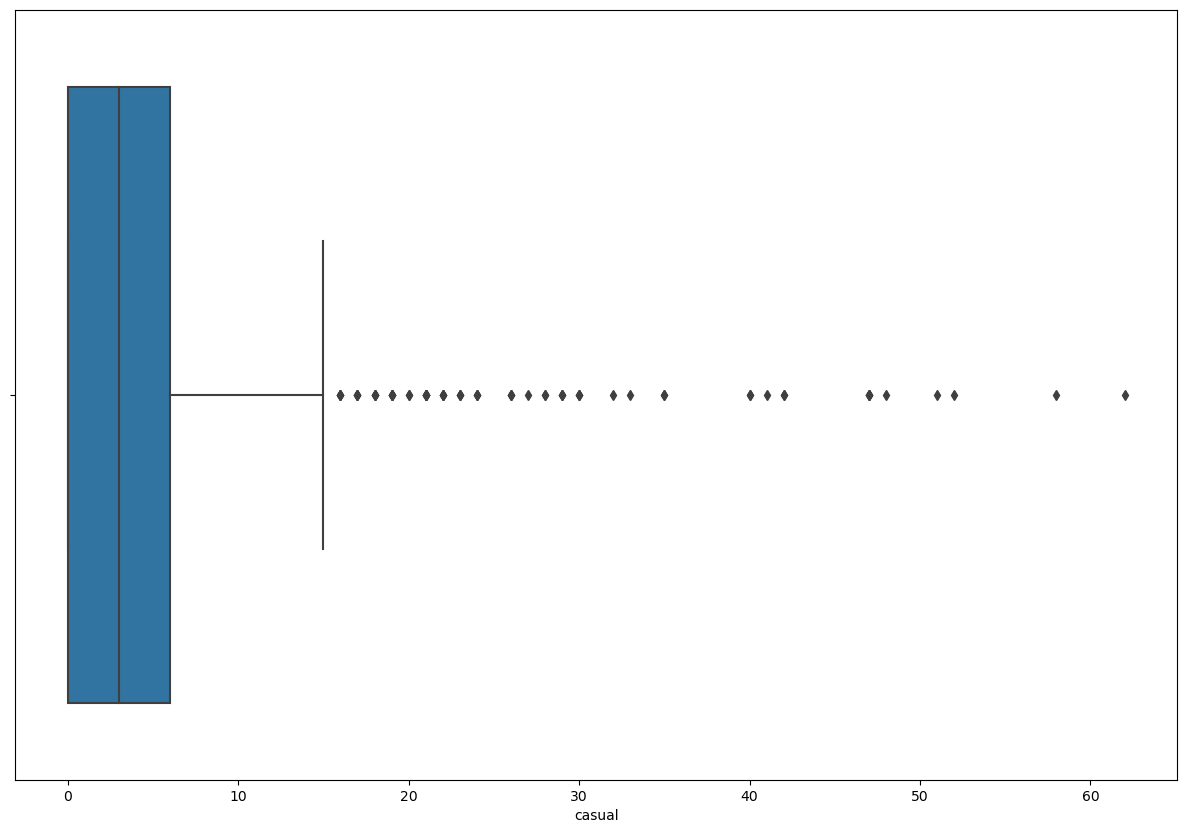

In [61]:
plt.figure(figsize=(15,10))
sns.boxplot(data=concat_data,x='casual')

In [62]:
iqr=q3-q1
iqr

67.0

# Treating Outliers

In [63]:
from scipy import stats

In [64]:
concat_data_num=concat_data.select_dtypes(include=['int64','float64'])

In [65]:
gd=np.abs(stats.zscore(concat_data_num))

In [66]:
print(np.where((gd>3)|(gd<-3))[0])

[ 12  13  13  13  14  14  14  15  16  23  24  24  27  27  28  85  85 122
 122 239 239 285 340 341 360 363 439 439 448 448 463 463 555 555 564 564
 565 565 585 756 756 807 808 809 810 811 812 828 828 837 837 852 852 875
 920 920 947 949 950 951 952 971 972 973 974 975 976]


In [67]:
print(np.where((gd>4)|(gd<-4))[0])

[ 13  15  16 439 808 809 810 811 812 951 952 971 972 973 974]


# Check Skewness and Correlation

In [68]:
concat_data.skew(axis=0,skipna=True,numeric_only=(int,float))

season        0.000000
yr            0.000000
mnth          0.812772
hr           -0.063524
holiday       6.229578
weekday       0.021925
weathersit    1.044098
temp          0.547997
atemp         0.435927
hum           0.436893
windspeed     0.433675
casual        3.414105
registered    1.296723
cnt           1.137709
dtype: float64

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='casual', ylabel='Density'>

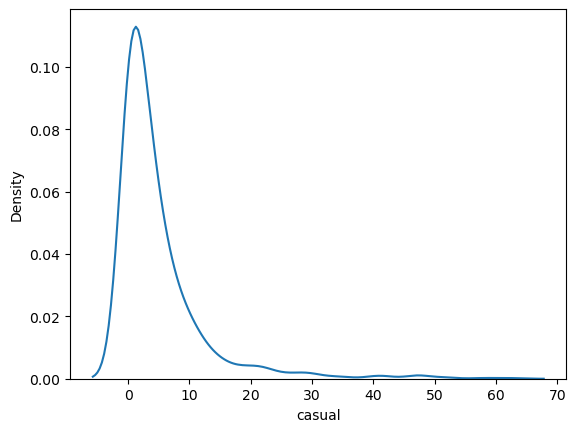

In [69]:
sns.kdeplot(concat_data['casual'])
##it is Symmetrical Skewness

<Axes: xlabel='registered', ylabel='Density'>

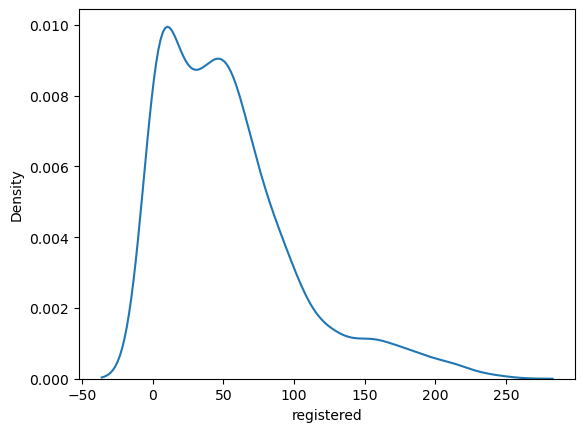

In [70]:
sns.kdeplot(concat_data['registered'])
    ##it is Asymmetrical Skewness

<Axes: xlabel='cnt', ylabel='Density'>

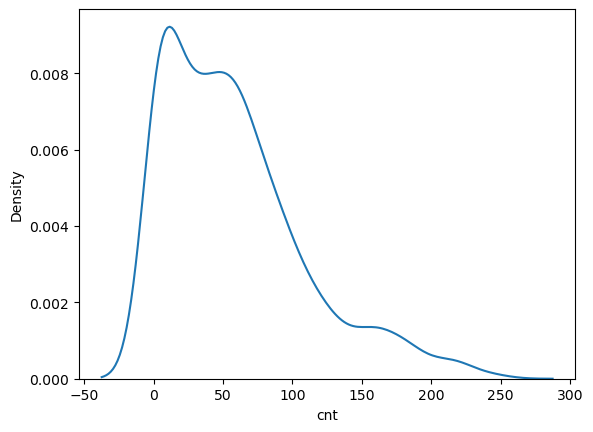

In [53]:
sns.kdeplot(concat_data['cnt'])
##it is Asymmetrical Skewness

In [71]:
concat_data.corr()

,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,1.000000,NaN,NaN,0.804299,-0.022421,-0.068456,0.010248,0.033310,0.022342,0.078681,0.073485,-0.064148,0.065002,0.066988,0.072671
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mnth,0.804299,NaN,NaN,1.000000,-0.025646,-0.105600,0.034710,0.014061,0.159660,0.192216,0.066587,-0.029383,0.088326,0.072660,0.081496
hr,-0.022421,NaN,NaN,-0.025646,1.000000,-0.005753,0.007531,-0.055802,0.203512,0.148524,-0.194853,0.116640,0.204476,0.357042,0.366047
holiday,-0.068456,NaN,NaN,-0.105600,-0.005753,1.000000,-0.148682,0.165443,-0.059728,-0.072091,-0.037542,-0.001111,-0.000944,-0.054350,-0.051196
weekday,0.010248,NaN,NaN,0.034710,0.007531,-0.148682,1.000000,0.060007,-0.081776,-0.051646,0.062469,-0.056754,-0.047363,0.020505,0.012161
weathersit,0.033310,NaN,NaN,0.014061,-0.055802,0.165443,0.060007,1.000000,0.106041,0.136962,0.539402,-0.177655,-0.096346,-0.119234,-0.126448
temp,0.022342,NaN,NaN,0.159660,0.203512,-0.059728,-0.081776,0.106041,1.000000,0.909940,0.080720,0.122625,0.470221,0.169045,0.229292
atemp,0.078681,NaN,NaN,0.192216,0.148524,-0.072091,-0.051646,0.136962,0.909940,1.000000,0.192440,-0.212119,0.423553,0.138231,0.193349


#weathersit is highly correlated with humidity and vice versa

#windspeed is highly correlated with casual

#temperature is highly correlated with atmosphere and vice versa

#casual is correlated with count

#count is highly correlated with registered and vice versa


In [ ]:
concat_data.to_csv('final_dataset.csv',index=False)